<a href="https://colab.research.google.com/github/Joon2000/machinelearning/blob/main/3_2_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""선형 회귀"""

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [12]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
#2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [11]:
#k-최근접 이웃 모델의 문제점

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#K-최근접 이웃 모델
knr.fit(train_input, train_target)
print(knr.predict([[50]]))
#실제 50cm 농어가 가지는 무게보다 많이 작음

[1033.33333333]


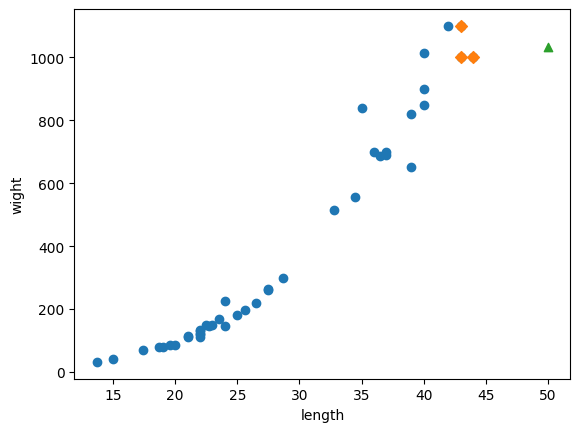

In [7]:
import matplotlib.pyplot as plt
#50cm 농어의 이웃
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

#훈련 세트 중 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터 (1033g)
plt.scatter(50, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('wight')
plt.show()

In [8]:
#50cm 농어의 이웃은 모두 45cm보다 작음!

#이웃 샘플들의 무게의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


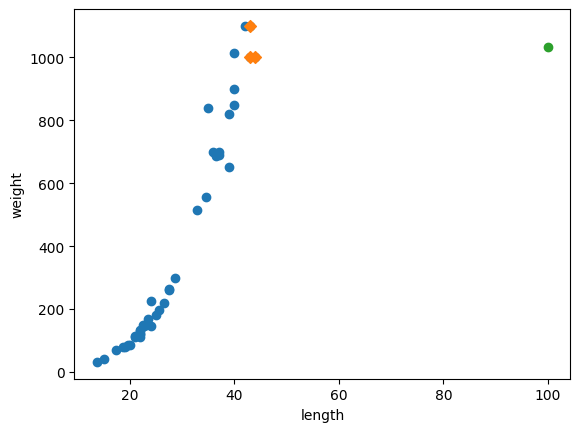

[1033.33333333]


In [10]:
#농어가 아무리 커도 k-이웃 모델에서는 농어의 무게가 늘어나지 않는다

# 100cm 농어
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100cm 농어의 예상 무게
predict_100 = knr.predict([[100]])
plt.scatter(100,predict_100)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(predict_100)

In [13]:
#선형 회귀

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델을 훈련합니다
lr.fit(train_input, train_target)

#50cm 농어 예측
print(lr.predict([[50]]))

[1241.83860323]


In [14]:
#lr의 parameter 
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


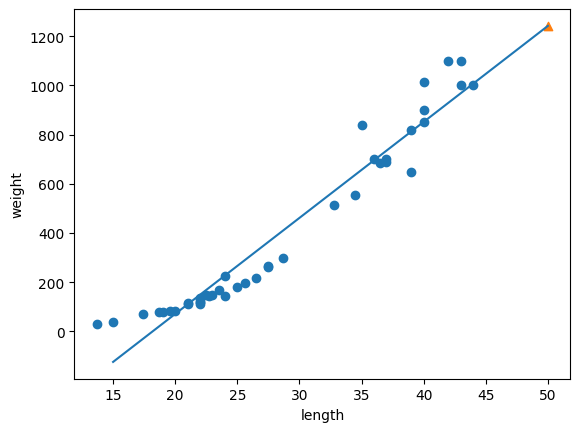

In [16]:
#선형회귀 직선 그리기

#훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, lr.predict([[50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
#square of R
print(lr.score(train_input, train_target)) #훈련 세트
print(lr.score(test_input, test_target)) #테스트 세트

#훈련세와 테스트세트 점수가 모두 낮음
#과소접합
#길이가 매우 짧으면 무게가 0보다 작은 경우가 존재할 숭 있음

0.939846333997604
0.8247503123313558


In [20]:
# 다항 회귀

#input을 제곱해서 input 앞에 붙이기(column_stack())
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [21]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

#50cm 샘플 예상
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [24]:
print(lr.coef_, lr.intercept_)
# 무게 = 1.01*길이**2-21.6*길이+116.05
#다항 회귀도 선형 회귀(치환)

[  1.01433211 -21.55792498] 116.0502107827827


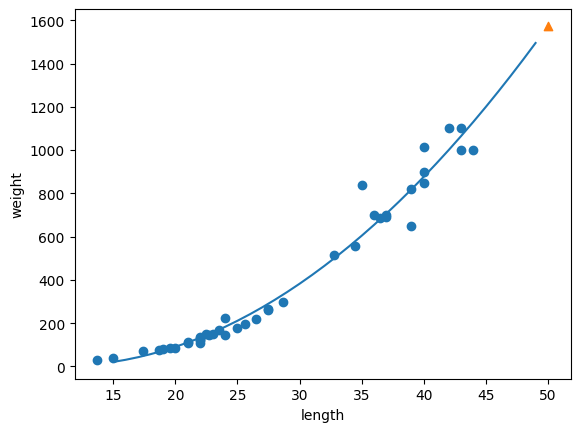

In [28]:
#그래프 그리기 (짧은 선을 이어서 곡선 만들기)

#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그린다
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point+lr.intercept_)

plt.scatter(50, lr.predict([[50**2, 50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#조금 과소접합

0.9706807451768623
0.9775935108325122
